In [ ]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn import tree

In [ ]:
# reading the data into dataframe
df = pd.read_csv('/content/car.data', names = (['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']))
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
# checking weather there are any null values
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


In [ ]:
# applying labelencoder to transform categorical to int datatype
df = df.apply(LabelEncoder().fit_transform)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
#describing the X and y values
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df['class']

In [ ]:
# fitting the data into model
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
result = export_text(dt, feature_names=list(X.columns))
print(result)

|--- persons <= 0.50
|   |--- class: 2
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- buying <= 0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- buying >  0.50
|   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- buying >  2.50
|   |   |   |--- maint <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- maint >  0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |--- safety >  0.50
|   |   |--- safety <= 1.50
|   |   |   |--- class: 2
|   |   |--- safety >  1.50
|   |   |   |--- lug_boot <= 1.50
|   |   |   |   |--- buying <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- buying >  2.50
|   |   |   |   |   |--- class: 2
|   

[Text(0.4875, 0.9166666666666666, 'x[3] <= 0.5\nentropy = 1.206\nsamples = 1728\nvalue = [384, 69, 1210, 65]'),
 Text(0.4375, 0.75, 'entropy = 0.0\nsamples = 576\nvalue = [0, 0, 576, 0]'),
 Text(0.4625, 0.8333333333333333, 'True  '),
 Text(0.5375, 0.75, 'x[5] <= 0.5\nentropy = 1.48\nsamples = 1152\nvalue = [384, 69, 634, 65]'),
 Text(0.5125, 0.8333333333333333, '  False'),
 Text(0.325, 0.5833333333333334, 'x[0] <= 2.5\nentropy = 1.687\nsamples = 384\nvalue = [204, 30, 85, 65]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= 0.5\nentropy = 1.669\nsamples = 288\nvalue = [158, 30, 35, 65]'),
 Text(0.1, 0.25, 'x[1] <= 2.5\nentropy = 0.857\nsamples = 96\nvalue = [69, 0, 27, 0]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.25\nsamples = 72\nvalue = [69, 0, 3, 0]'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 24, 0]'),
 Text(0.3, 0.25, 'x[4] <= 1.5\nentropy = 1.653\nsamples = 192\nvalue = [89, 30, 8, 65]'),
 Text(0.25, 0.08333333333333333, 'entropy = 1.291\nsamp

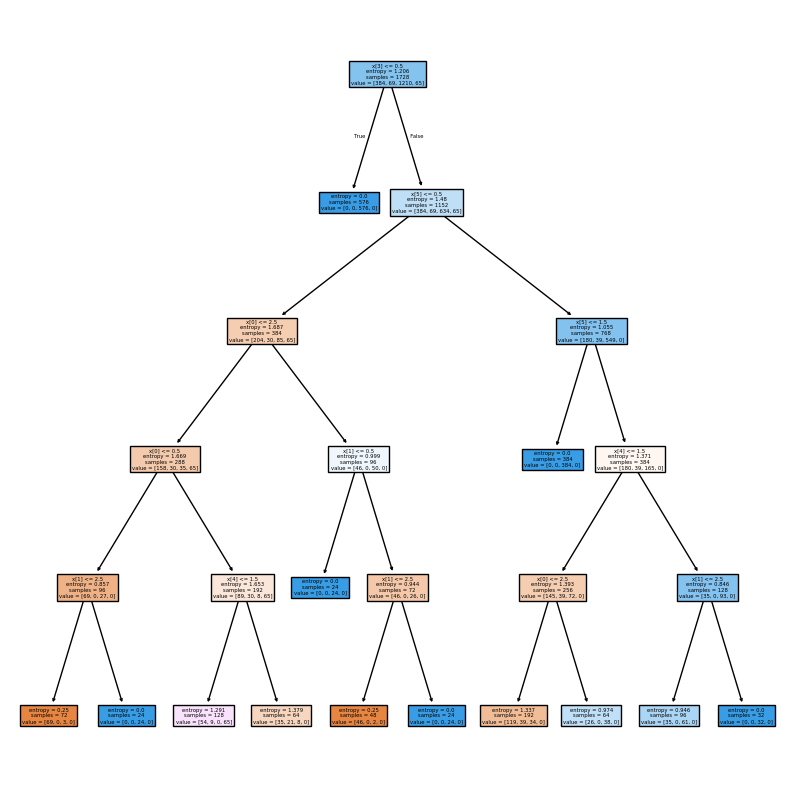

In [ ]:
#ploting the decision tree
fig,ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt, ax=ax, filled=True)

In [ ]:
dt.score(X, y)

0.8663194444444444

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_pred = dt1.predict(X_test)

In [ ]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
599,2,2
1201,0,0
628,2,2
1498,0,0
1263,2,2
...,...,...
100,2,2
274,2,2
1206,2,2
101,2,2


[Text(0.5125, 0.9166666666666666, 'x[3] <= 0.5\nentropy = 1.194\nsamples = 1382\nvalue = [301.0, 58.0, 975.0, 48.0]'),
 Text(0.4625, 0.75, 'entropy = 0.0\nsamples = 450\nvalue = [0, 0, 450, 0]'),
 Text(0.4875, 0.8333333333333333, 'True  '),
 Text(0.5625, 0.75, 'x[5] <= 0.5\nentropy = 1.463\nsamples = 932\nvalue = [301, 58, 525, 48]'),
 Text(0.5375, 0.8333333333333333, '  False'),
 Text(0.375, 0.5833333333333334, 'x[0] <= 2.5\nentropy = 1.677\nsamples = 306\nvalue = [165, 25, 68, 48]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= 0.5\nentropy = 1.658\nsamples = 230\nvalue = [129, 25, 28, 48]'),
 Text(0.1, 0.25, 'x[1] <= 2.5\nentropy = 0.816\nsamples = 79\nvalue = [59, 0, 20, 0]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.28\nsamples = 62\nvalue = [59, 0, 3, 0]'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0]'),
 Text(0.3, 0.25, 'x[4] <= 1.5\nentropy = 1.694\nsamples = 151\nvalue = [70.0, 25.0, 8.0, 48.0]'),
 Text(0.25, 0.08333333333333333, 'entrop

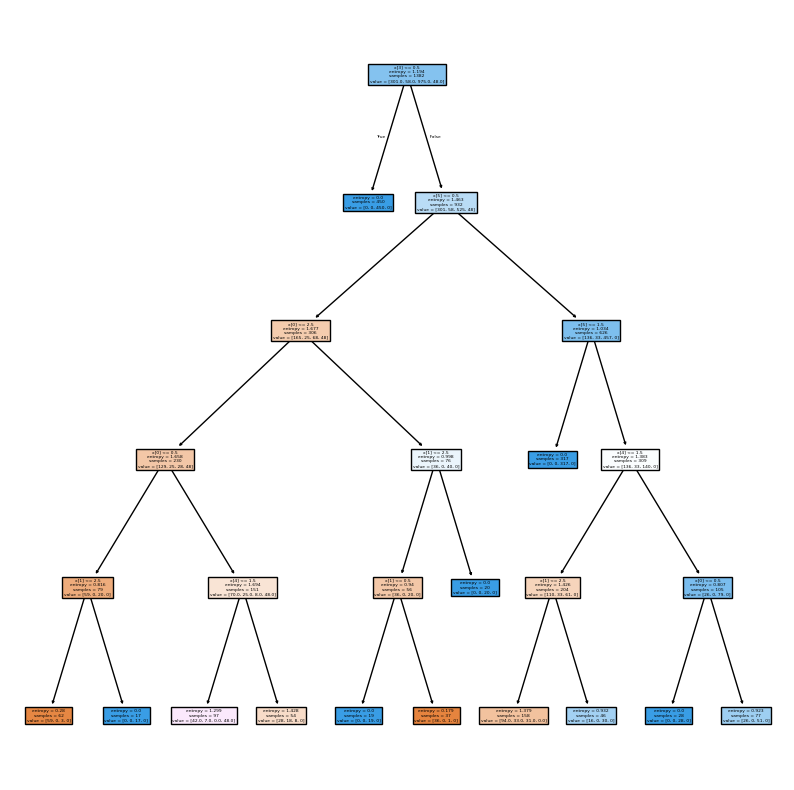

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt1, ax=ax, filled=True)

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=5, criterion='gini')
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt2.score(X_train, y_train)

0.8733719247467439

In [ ]:
print(export_text(dt2, feature_names=list(X.columns)))

|--- persons <= 0.50
|   |--- class: 2
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- buying <= 0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- buying >  0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 0
|   |   |--- buying >  2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- maint <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- maint >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- class: 2
|   |--- safety >  0.50
|   |   |--- safety <= 1.50
|   |   |   |--- class: 2
|   |   |--- safety >  1.50
|   |   |   |--- lug_boot <= 1.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=5, criterion='log_loss')
dt3.fit(X, y)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [ ]:
dt3.score(X, y)

0.8663194444444444

In [ ]:
print(export_text(dt3, feature_names=list(X.columns)))

|--- persons <= 0.50
|   |--- class: 2
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- buying <= 0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- buying >  0.50
|   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- buying >  2.50
|   |   |   |--- maint <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- maint >  0.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   |--- safety >  0.50
|   |   |--- safety <= 1.50
|   |   |   |--- class: 2
|   |   |--- safety >  1.50
|   |   |   |--- lug_boot <= 1.50
|   |   |   |   |--- maint <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- maint >  2.50
|   |   |   |   |   |--- class: 2
|   | 